Hi!

If I were a Real Data Scientist, I'd probably be using [pandas](https://pandas.pydata.org/) or something, but I'm not, so I'm using the [datascience](http://data8.org/datascience/) package that the Data 8 course uses.

In [204]:
import numpy as np
from datascience import *
from datetime import date
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
def scale_plot_size(factor=1):
    default_dpi = plots.rcParamsDefault['figure.dpi']
    plots.rcParams['figure.dpi'] = default_dpi*factor

To start with, let's make a table of the height and weight data we'll be working with.  For now, dates are just strings, but we'll fix that later!

In [205]:
heightweight = Table().with_columns([
    'Date',        ['07/28/2017', '08/07/2017', '08/25/2017', '09/25/2017', '11/28/2017', '01/26/2018', '04/27/2018', '07/30/2018'],
    'Height (cm)', [        53.3,         54.6,         55.9,           61,         63.5,         67.3,         71.1,         74.9],
    'Weight (kg)', [       4.204,         4.65,        5.425,         6.41,        7.985,        9.125,        10.39,       10.785],
                                    ])
heightweight

Date,Height (cm),Weight (kg)
07/28/2017,53.3,4.204
08/07/2017,54.6,4.65
08/25/2017,55.9,5.425
09/25/2017,61,6.41
11/28/2017,63.5,7.985
01/26/2018,67.3,9.125
04/27/2018,71.1,10.39
07/30/2018,74.9,10.785


Cool.  Now we can plot weight as a function of height.

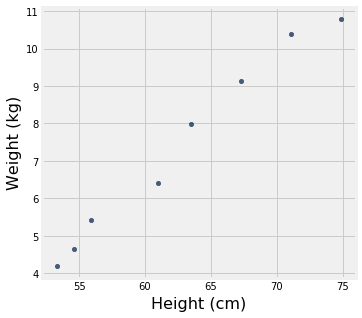

In [206]:
heightweight.scatter('Height (cm)', 'Weight (kg)')

It looks as though height and weight are more or less linearly related!  We'll come back to that in a moment, but first, let's convert them to standard units.

A value in standard units is _how many standard deviations above the mean_ it is.  So, to convert a data point to standard units, we first subtract the mean from it, and then divide that by the standard deviation.  The `standard_units` function below, which comes [from the Data 8 textbook](https://www.inferentialthinking.com/chapters/14/2/Variability#standard-units), does this for a whole array of numbers at once.

In [207]:
def standard_units(nums):
    return (nums - np.mean(nums)) / np.std(nums)

Now we can create a version of the `heightweight` table that's in standard units. 

In [208]:
heightweight_standard = Table().with_columns(
    "Date", heightweight.column('Date'),
    "Height (standard units)", standard_units(heightweight.column('Height (cm)')),
    "Weight (standard units)", standard_units(heightweight.column('Weight (kg)')))
heightweight_standard

Date,Height (standard units),Weight (standard units)
07/28/2017,-1.26135,-1.3158
08/07/2017,-1.08691,-1.13054
08/25/2017,-0.912464,-0.808628
09/25/2017,-0.228116,-0.399485
11/28/2017,0.107349,0.254728
01/26/2018,0.617255,0.728253
04/27/2018,1.12716,1.2537
07/30/2018,1.63707,1.41777


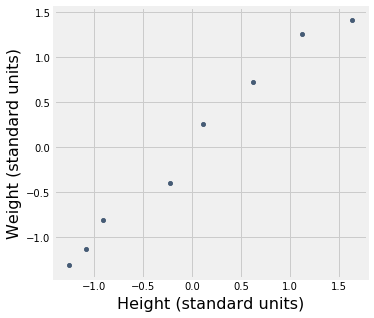

In [209]:
heightweight_standard.scatter('Height (standard units)', 'Weight (standard units)')

Now that we've got standard units, it's easy to compute the correlation coefficient $r$.  First, we need to take the product of our $x$ and $y$ values -- in this case, height and weight -- for each data point.  We'll add a new column to our table that has these products.

In [210]:
heightweight_product = heightweight_standard.with_column(
    'Product of standard units',
    heightweight_standard.column('Height (standard units)') * heightweight_standard.column('Weight (standard units)'))
heightweight_product

Date,Height (standard units),Weight (standard units),Product of standard units
07/28/2017,-1.26135,-1.3158,1.65968
08/07/2017,-1.08691,-1.13054,1.22879
08/25/2017,-0.912464,-0.808628,0.737844
09/25/2017,-0.228116,-0.399485,0.091129
11/28/2017,0.107349,0.254728,0.0273447
01/26/2018,0.617255,0.728253,0.449518
04/27/2018,1.12716,1.2537,1.41312
07/30/2018,1.63707,1.41777,2.32099


Now, to compute $r$, we just need to take the mean of the product column.

In [211]:
r = np.mean(heightweight_product.column('Product of standard units'))
r

0.9910523777994954

We see that $r$ s very close to 1, which means that our data has an almost perfect linear correlation.

Let's see what that looks like.  Now that we have $r$, we can plot the regression line.  (We're actually just plotting a segment of it here that goes from -2 to 2 on the $x$-axis, because that's what happens to fit nicely on the figure, but we could pick any segment we want.)

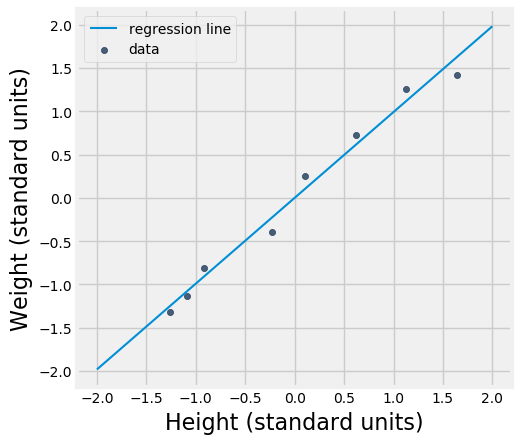

In [234]:
heightweight_standard.scatter("Height (standard units)", "Weight (standard units)", label="data")
x = np.array(range(-2, 3))  
y = r * x # <-- the regression equation!
plots.plot(x, y, label="regression line", linewidth=1.5)  
plots.legend();

Since $r$ is so close to 1, the regression line is awfully close to $y = x$, a perfect linear correlation.  Let's make the plot a little bigger so we can see what's going on and plot that perfect linear correlation line, too.

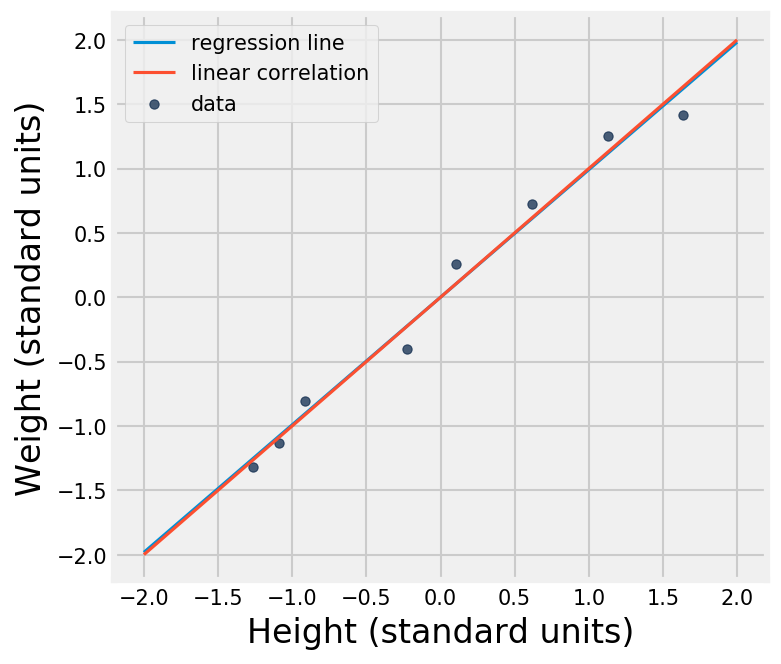

In [235]:
scale_plot_size(1.5)
heightweight_standard.scatter("Height (standard units)", "Weight (standard units)", label="data")
x = np.array(range(-2, 3))  
y = r * x # <-- the regression equation
plots.plot(x, y, label="regression line", linewidth=1.5)  
y = x # <-- linear correlation
plots.plot(x, y, label="linear correlation", linewidth=1.5)  
plots.legend()
scale_plot_size(1)

We can see that the slope of the actual regression line is just sliiiiightly smaller than the slope of the line $y = x$.

In [141]:
heightweight = heightweight.with_columns(
   "Date",
    [datetime.strptime(date, "%m/%d/%Y").date() for date in heightweight.column(0)])
heightweight

Date,Height (cm),Weight (kg)
2017-07-28,53.3,4.204
2017-08-07,54.6,4.65
2017-08-25,55.9,5.425
2017-09-25,61,6.41
2017-11-28,63.5,7.985
2018-01-26,67.3,9.125
2018-04-27,71.1,10.39
2018-07-30,74.9,10.785


In [142]:
birthday = date(2017,7,24)
days_since_birth = [(date - birthday).days for date in heightweight.column('Date')]
heightweight_with_days = heightweight.with_columns("Days Since Birth", days_since_birth)
heightweight_with_days

Date,Height (cm),Weight (kg),Days Since Birth
2017-07-28,53.3,4.204,4
2017-08-07,54.6,4.65,14
2017-08-25,55.9,5.425,32
2017-09-25,61,6.41,63
2017-11-28,63.5,7.985,127
2018-01-26,67.3,9.125,186
2018-04-27,71.1,10.39,277
2018-07-30,74.9,10.785,371


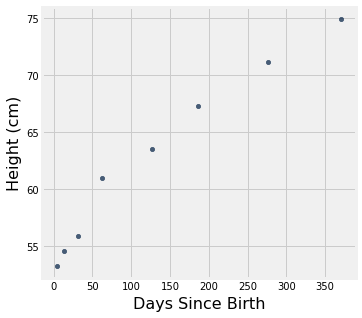

In [143]:
heightweight_with_days.scatter('Days Since Birth', 'Height (cm)')

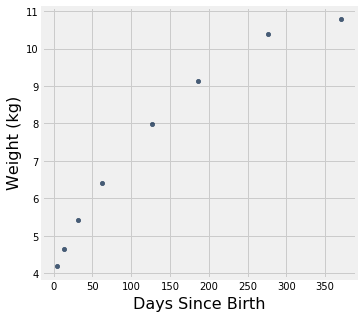

In [144]:
heightweight_with_days.scatter('Days Since Birth', 'Weight (kg)')